<a href="https://colab.research.google.com/github/jblackM1/AAI_590-Capstone-Project/blob/main/AAI_590_Capstone_Product_Review_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library Setup

In [ ]:
!pip install imbalanced-learn

In [ ]:
!pip install fuzzywuzzy

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Setup

In [ ]:
#@title Load H&M Articles data
file_path = '/content/drive/MyDrive/h-and-m-personalized-fashion-recommendations/articles.csv'

# Read the CSV file into a DataFrame
df_article_info = pd.read_csv(file_path)

In [ ]:
df_product_reviews = df_article_info.dropna(subset=['detail_desc'])

In [ ]:
top_products = df_article_info[df_article_info['product_type_name'] == 'Top']

In [ ]:
len(top_products)

4155

In [ ]:
df_article_info.dtypes

article_id                       int64
product_code                     int64
prod_name                       object
product_type_no                  int64
product_type_name               object
product_group_name              object
graphical_appearance_no          int64
graphical_appearance_name       object
colour_group_code                int64
colour_group_name               object
perceived_colour_value_id        int64
perceived_colour_value_name     object
perceived_colour_master_id       int64
perceived_colour_master_name    object
department_no                    int64
department_name                 object
index_code                      object
index_name                      object
index_group_no                   int64
index_group_name                object
section_no                       int64
section_name                    object
garment_group_no                 int64
garment_group_name              object
detail_desc                     object
dtype: object

In [ ]:
#@title Load Product Review data
# Replace the file path with your actual file path
file_path = '/content/drive/MyDrive/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv'

# Read the CSV file into a DataFrame
df_product_reviews = pd.read_csv(file_path)

In [ ]:
df_product_reviews = df_product_reviews.dropna(subset=['Review Text'])
df_product_reviews = df_product_reviews[df_product_reviews['Review Text'].apply(lambda x: isinstance(x, str))]

In [ ]:
df_product_reviews.dtypes

Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [ ]:
top_products_reviews = df_product_reviews[df_product_reviews['Department Name'] == 'Tops']

In [ ]:
print(len(top_products_reviews))
print(len(df_product_reviews))

10048
22641


In [ ]:
df_product_reviews.head(10)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


In [ ]:
top_products.head(10)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
15,116379047,116379,Frugan longsleeve,254,Top,Garment Upper body,1010016,Solid,73,Dark Blue,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Fitted top in soft stretch jersey with a wide ...
43,145872051,145872,Dorian l/s basic,254,Top,Garment Upper body,1010010,Melange,9,Black,...,Men Sport Woven,S,Sport,26,Sport,22,Men H&M Sport,1005,Jersey Fancy,"Long-sleeved sports top in fast-drying, breath..."
81,163734002,163734,KOMPIS 2-pack L/S,254,Top,Garment Upper body,1010016,Solid,9,Black,...,Young Girl Jersey Basic,I,Children Sizes 134-170,4,Baby/Children,79,Girls Underwear & Basics,1002,Jersey Basic,Long-sleeved tops in soft organic cotton.
82,163734054,163734,KOMPIS 2-pack L/S,254,Top,Garment Upper body,1010010,Melange,71,Light Blue,...,Young Girl Jersey Basic,I,Children Sizes 134-170,4,Baby/Children,79,Girls Underwear & Basics,1002,Jersey Basic,Long-sleeved tops in soft organic cotton.
388,234622003,234622,RAF basic rollerneck SB 2-p,254,Top,Garment Upper body,1010016,Solid,73,Dark Blue,...,Kids Boy Jersey Basic,H,Children Sizes 92-140,4,Baby/Children,72,Boys Underwear & Basics,1002,Jersey Basic,"Long-sleeved, polo-neck tops in organic cotton..."
389,234622004,234622,RAF basic rollerneck SB 2-p,254,Top,Garment Upper body,1010016,Solid,7,Grey,...,Kids Boy Jersey Basic,H,Children Sizes 92-140,4,Baby/Children,72,Boys Underwear & Basics,1002,Jersey Basic,"Long-sleeved, polo-neck tops in organic cotton..."
390,234622007,234622,RAF basic 2-pack rollerneck SB,254,Top,Garment Upper body,1010016,Solid,10,White,...,Kids Boy Jersey Basic,H,Children Sizes 92-140,4,Baby/Children,72,Boys Underwear & Basics,1002,Jersey Basic,"Long-sleeved, polo-neck tops in organic cotton..."
396,237222001,237222,Helsinki,254,Top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Fitted Henley top in soft cotton jersey with a...
397,237222012,237222,Helsinki,254,Top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Fitted Henley top in soft cotton jersey with a...
398,237222016,237222,Ingrid,254,Top,Garment Upper body,1010017,Stripe,73,Dark Blue,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Fitted Henley top in soft cotton jersey with a...


# Merge Data

In [ ]:
top_products_reviews = top_products_reviews.sample(frac=0.3, random_state=42)
top_products = top_products.sample(frac=0.9, random_state=42)

In [ ]:
import spacy
import numpy as np

# Assuming df_reference is top_products
# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Global set to keep track of selected article IDs
selected_article_ids = set()

# Concatenate relevant text columns in the reference dataframe
reference_text = top_products['product_group_name'] + ' ' + top_products['department_name'] + ' ' + top_products['garment_group_name']

# Tokenize the reference text
reference_docs = list(nlp.pipe(reference_text))

# Function to calculate similarity scores
def calculate_similarity(input_doc, reference_docs):
    return np.array([input_doc.similarity(doc) for doc in reference_docs])

# Function to find the best match article ID
def find_best_match(row):
    global selected_article_ids

    # Tokenize the input text
    input_doc = nlp(str(row['Division Name']) + ' ' + str(row['Department Name']) + ' ' + str(row['Class Name']) + ' ' + str(row['Review Text']))

    # Calculate similarity scores
    similarity_scores = calculate_similarity(input_doc, reference_docs)

    # Find the index with the highest similarity score that is not in selected_article_ids
    valid_indices = [i for i in range(len(similarity_scores)) if top_products.iloc[i]['article_id'] not in selected_article_ids]

    if not valid_indices:
        # All article IDs have been used, handle this case as needed
        return None

    best_match_index = max(valid_indices, key=lambda i: similarity_scores[i])

    # Get the corresponding article ID
    best_match_article_id = top_products.iloc[best_match_index]['article_id']

    # Add the selected article ID to the set
    selected_article_ids.add(best_match_article_id)

    return best_match_article_id

# Apply the function to each row in top_products_reviews
top_products_reviews['article_id'] = top_products_reviews.apply(find_best_match, axis=1)


<ipython-input-217-b86d9f330d81>:19: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  return np.array([input_doc.similarity(doc) for doc in reference_docs])


In [ ]:
top_products_reviews.to_csv('top_products_reviews1.csv', index=False)

In [ ]:
unique_best_match_article_ids = top_products_reviews['article_id'].unique()
len(unique_best_match_article_ids)

3014

In [ ]:
top_products_reviews.head(50)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,article_id
1538,1538,947,52,NaN,Love this sweater. fun for fall. soft fabric a...,4,1,0,General,Tops,Sweaters,649271003.0
2857,2857,829,52,"Nice boxy shirt, pretty buttons","Runs really large. i am 5'4"", 120lbs, 32c, and...",4,1,3,General Petite,Tops,Blouses,898818003.0
16999,16999,944,50,Stylish lucsiously soft sweater!,I see no one has reviewed this yet and since i...,4,1,1,General,Tops,Sweaters,557084001.0
20711,20711,945,64,Love but itchy for me,Adorable & unique swtr & wld go w/ many things...,5,1,0,General,Tops,Sweaters,649323001.0
16740,16740,867,29,NaN,I loved this top so much i bought both colors!...,5,1,1,General Petite,Tops,Knits,617725017.0
1318,1318,836,59,Too billowy,Bought this top at my local store and tried it...,3,1,16,General,Tops,Blouses,649271001.0
17597,17597,824,52,Busty? curvy? no problem!,I adore this blouse. the colors are vibrant (s...,5,1,0,General Petite,Tops,Blouses,617725001.0
8940,8940,862,52,"Comfortable, flattering, seasonless top",I am glad to add this very versitile top to my...,5,1,8,General Petite,Tops,Knits,752020004.0
10129,10129,872,53,Great casual top,"Love this top for casual days. fits perfectly,...",5,1,0,General Petite,Tops,Knits,738777001.0
13433,13433,927,37,It's a keep,This is a gorgeous piece-the pattern and color...,5,1,0,General Petite,Tops,Sweaters,840959002.0


In [ ]:
top_products_reviews.dtypes

Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
article_id                  int64
dtype: object

# MLP Data

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

In [ ]:
# Assuming 'product_id' is the common column
top_products_reviews = top_products_reviews.merge(top_products, how='left', left_on='article_id', right_on='article_id')

In [ ]:
# Assuming df_product_reviews is your DataFrame
top_products_reviews_encoded = top_products_reviews.copy()

label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in ['Division Name', 'Department Name', 'Class Name']:
    top_products_reviews_encoded[column] = label_encoder.fit_transform(top_products_reviews[column])

top_products_reviews = top_products_reviews_encoded.copy()

In [ ]:
top_products_reviews = top_products_reviews.dropna()

In [ ]:
top_products_reviews.dtypes

Unnamed: 0                       int64
Clothing ID                      int64
Age                              int64
Title                           object
Review Text                     object
Rating                           int64
Recommended IND                  int64
Positive Feedback Count          int64
Division Name                    int64
Department Name                  int64
Class Name                       int64
article_id                       int64
product_code                     int64
prod_name                       object
product_type_no                  int64
product_type_name               object
product_group_name              object
graphical_appearance_no          int64
graphical_appearance_name       object
colour_group_code                int64
colour_group_name               object
perceived_colour_value_id        int64
perceived_colour_value_name     object
perceived_colour_master_id       int64
perceived_colour_master_name    object
department_no            

In [ ]:
#columns_to_include =  ['Division Name', 'Department Name', 'Class Name', 'article_id']
#columns_to_include =  ['Division Name', 'Class Name', 'article_id']
columns_to_include =  ['Division Name', 'Class Name', 'Clothing ID', 'article_id']

# Assuming X contains your features (excluding 'Rating') and y contains the target variable 'Rating'
X = top_products_reviews[columns_to_include]
y = top_products_reviews['Rating']

Text(0.5, 1.0, 'Correlation Matrix')

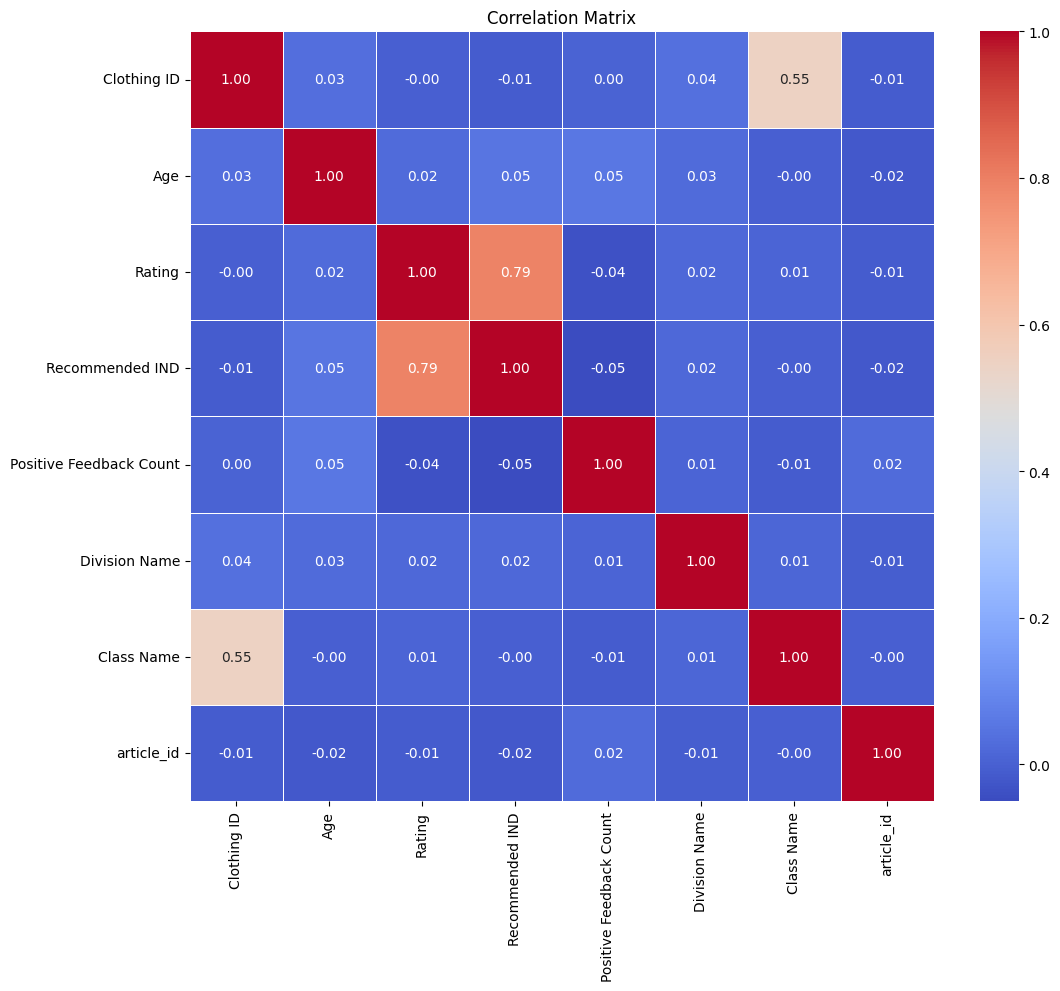

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting columns for correlation analysis
columns_to_include = ['Clothing ID', 'Age', 'Rating', 'Recommended IND', 'Positive Feedback Count',
                       'Division Name', 'Class Name', 'article_id']

# Creating a subset of the DataFrame with selected columns
df_selected = top_products_reviews[columns_to_include]

# Creating a correlation matrix
correlation_matrix = df_selected.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
#plt.show()

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)
X_train = X_train_resampled
y_train = y_train_resampled

In [ ]:
class_counts = y_train.value_counts()
print(class_counts)

2    1150
1    1150
5    1150
3    1150
4    1150
Name: Rating, dtype: int64


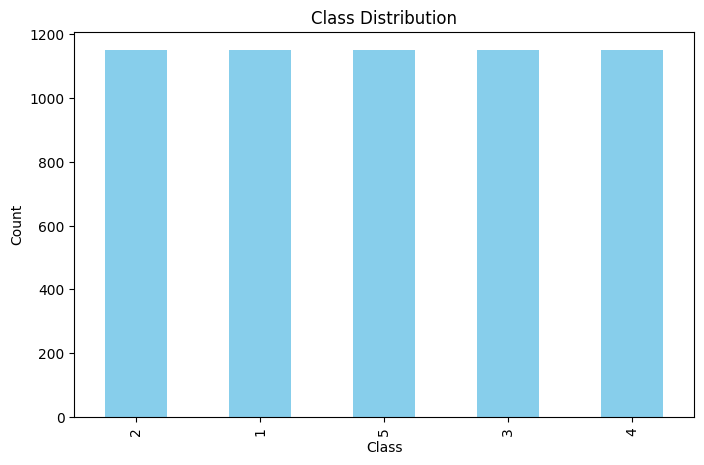

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
y_train.value_counts().plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [ ]:
#@title Train Model
# Choose and train the model (Linear Regression in this example)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Create a scaler
scaler = StandardScaler()

#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

#model = LogisticRegression(random_state=42)
#model.fit(X_train, y_train)

y_train_encoded = label_encoder.fit_transform(y_train)

# Fit and transform the target variable in testing data
y_test_encoded = label_encoder.transform(y_test)

# Now, you can train your XGBoost model using y_train_encoded
model = XGBClassifier(
    n_estimators=350,
    learning_rate=0.1,
    max_depth=17,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=17, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=350, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [200, 250,300,350],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [11,13,15,17]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train_encoded)

# Print the best parameters
print(grid_search.best_params_)


{'learning_rate': 0.1, 'max_depth': 11, 'n_estimators': 350}


In [ ]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate Precision, Recall, and F1-score
precision = precision_score(y_test_encoded, y_pred, average='weighted')
recall = recall_score(y_test_encoded, y_pred, average='weighted')
f1 = f1_score(y_test_encoded, y_pred, average='weighted')
mse = mean_squared_error(y_test_encoded, y_pred)
rmse = np.sqrt(mse)
accuracy = accuracy_score(y_test_encoded, y_pred)

# Print Precision, Recall, and F1-score
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Squared Error: {mse}')


Accuracy: 0.3435114503816794
Precision: 0.31488564035677735
Recall: 0.3435114503816794
F1-score: 0.3278799982646455
Root Mean Squared Error (RMSE): 1.5665881632651393
Mean Squared Error: 2.454198473282443


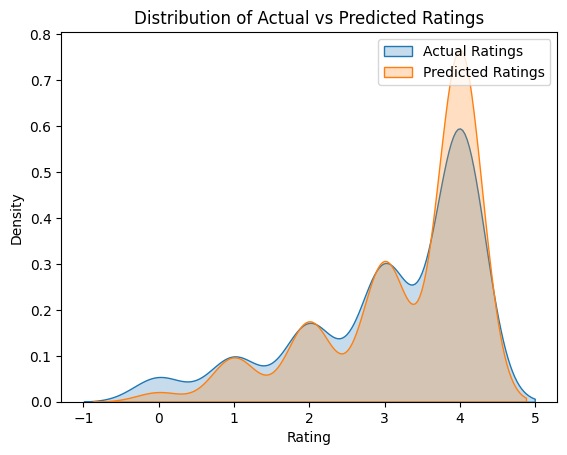

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create a kernel density plot
sns.kdeplot(y_test_encoded, label='Actual Ratings', fill=True)
sns.kdeplot(y_pred, label='Predicted Ratings', fill=True)
plt.title('Distribution of Actual vs Predicted Ratings')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred)

print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[  0   1   1   5  16]
 [  0   4   7  12  19]
 [  1   3  11  20  38]
 [  2  10  21  19  76]
 [  5  19  27  61 146]]


Accuracy: 0.41954022988505746


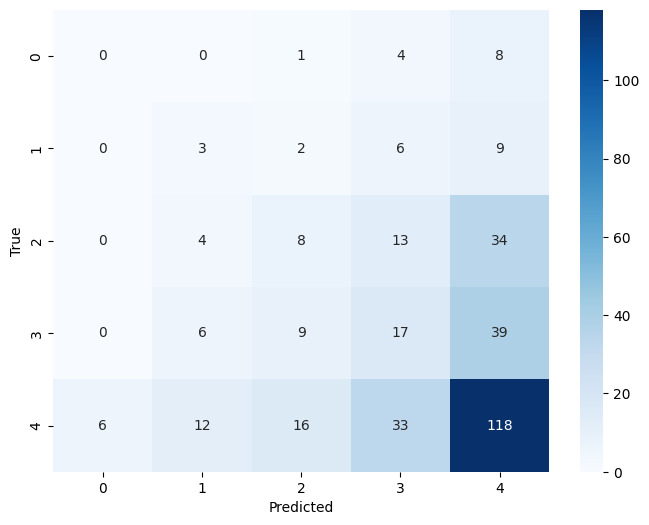

In [ ]:
#@title Plot confusion matrix


# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f'Accuracy: {accuracy}')

# Plot confusion matrix
conf_mat = confusion_matrix(y_test_encoded, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
#@title Display classification report
from sklearn.metrics import classification_report

classification_rep = classification_report(y_test_encoded,y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.11      0.10      0.10        42
           2       0.16      0.15      0.16        73
           3       0.16      0.15      0.16       128
           4       0.49      0.57      0.53       258

    accuracy                           0.34       524
   macro avg       0.19      0.19      0.19       524
weighted avg       0.31      0.34      0.33       524

